# Naive Bayes Classifier


# Question:-
Ques.1. What is the core assumption of Naive Bayes?
Ans.1. Naive Bayes assumes that all features (input variables) are conditionally independent of each other given the class label. This "naive" assumption simplifies computation, making the algorithm fast and efficient, even on high-dimensional data.


Ques.2.Differentiate between GaussianNB, MultinomialNB, and BernoulliNB?
Ans.2.GaussianNB is used for continuous data and assumes the features follow a normal distribution.

MultinomialNB is suited for discrete count features like word counts in text classification.

BernoulliNB is used for binary features, where input is either 0 or 1 (e.g., word present or not).


Ques.3.Why is Naive Bayes considered suitable for high-dimensional data?
Ans.3.Naive Bayes works well with high-dimensional data because it assumes feature independence, reducing computational complexity. It performs efficiently in text classification tasks where the number of features (words) can be very large.




Accuracy: 0.9856502242152466
Precision: 0.9403973509933775
Recall: 0.9530201342281879

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



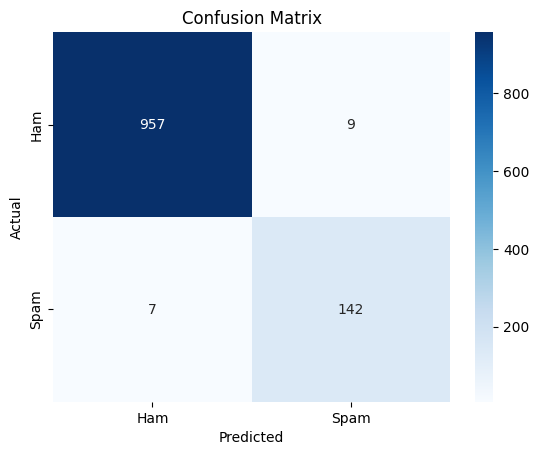

In [1]:
# Task2:-
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [2]:
# Task3:-
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nGaussianNB Classification Report:\n", classification_report(y_test, y_pred_nb))

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))


GaussianNB Accuracy: 1.0

GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Logistic Regression Accuracy: 1.0

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Decision Tree

# Question:-
Ques1.What is entropy and information gain?
Ans1.ntropy measures the disorder or impurity in a dataset. It is 0 when all samples belong to one class and maximum when classes are evenly mixed.

Information gain is the reduction in entropy after splitting the dataset based on a feature. It helps select the best feature for decision tree splits.

Ques2.Explain the difference between Gini Index and Entropy.
Ans2.Gini Index measures impurity based on the probability of misclassification; it's simpler and computationally faster.

Entropy uses logarithmic probabilities to measure disorder; it's slightly more accurate but computationally heavier.

Both are used to decide the best split at a node in a decision tree.

Ques3. How can a decision tree overfit? How can this be avoided?
Ans3.A decision tree overfits when it memorizes the training data, capturing noise instead of patterns, especially if grown too deep.

To avoid overfitting, you can use pruning, set limits like max_depth, min_samples_split, or use ensemble methods like Random Forests.



Accuracy: 0.6923076923076923

Confusion Matrix:
 [[62 18]
 [26 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74        80
           1       0.67      0.59      0.63        63

    accuracy                           0.69       143
   macro avg       0.69      0.68      0.68       143
weighted avg       0.69      0.69      0.69       143



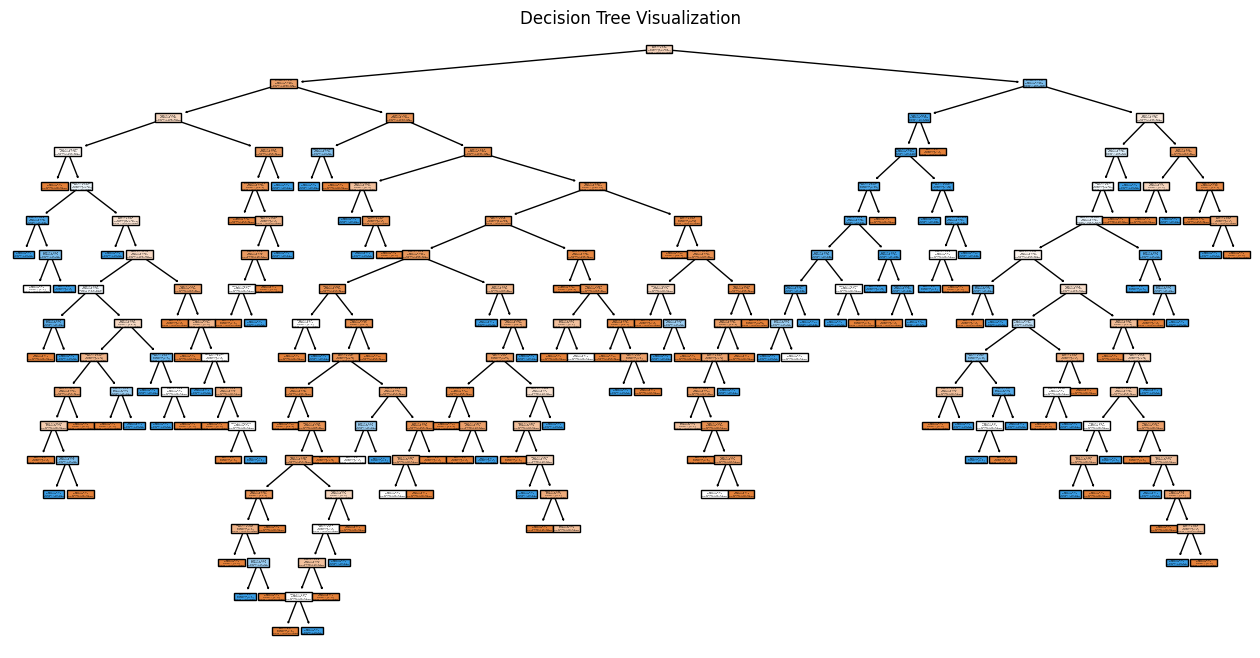

In [3]:
# Task2:-
# Task 5: Decision Tree on Titanic Dataset

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Preprocessing
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]
df.dropna(inplace=True)

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Features and target
X = df.drop('survived', axis=1)
y = df['survived']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Prediction
y_pred = dt.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot tree
plt.figure(figsize=(16, 8))
plot_tree(dt, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


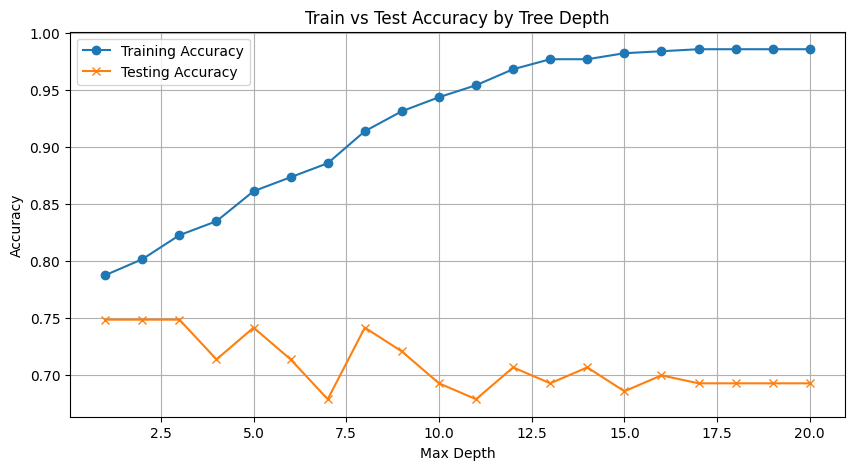

In [ ]:
# Task3:-
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

train_accuracies = []
test_accuracies = []
depths = range(1, 21)

df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]
df.dropna(inplace=True)

df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))

# Plot train vs test accuracy
plt.figure(figsize=(10, 5))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='x')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy by Tree Depth')
plt.legend()
plt.grid(True)
plt.show()


# Ensemble Learning

# Question
Ques1. What is the difference between Bagging and Boosting?
Ans1. - Bagging (Bootstrap Aggregating) builds multiple models independently and aggregates their results (e.g., by voting).
   - Boosting builds models sequentially, where each new model focuses on correcting the errors made by the previous ones.

Ques2. How does Random Forest reduce variance?
Ans2- Random Forest reduces variance by training multiple decision trees on different random subsets of the data and averaging their outputs, which cancels out overfitting from individual trees.

Ques3. What is the weakness of boosting-based methods?
Ans3  - Boosting can overfit if not properly regularized and may be sensitive to noisy data or outliers since it tries to fix all mistakes.


Decision Tree:
Accuracy: 0.7832167832167832
Precision: 0.7142857142857143
Recall: 0.819672131147541

Random Forest:
Accuracy: 0.8251748251748252
Precision: 0.8103448275862069
Recall: 0.7704918032786885


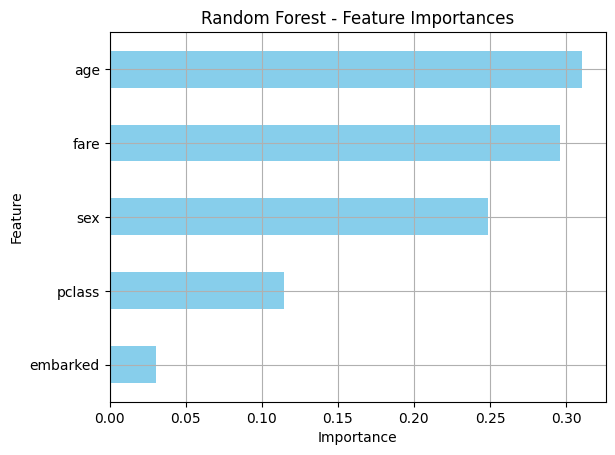

In [ ]:
# Task2:-
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')
df = df[['pclass', 'sex', 'age', 'fare', 'embarked', 'survived']].dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Precision:", precision_score(y_test, dt_preds))
print("Recall:", recall_score(y_test, dt_preds))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Random Forest - Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


In [ ]:
# Task3:-
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import time

df = sns.load_dataset('titanic')
df = df[['pclass', 'sex', 'age', 'fare', 'embarked', 'survived']].dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


boost_model = GradientBoostingClassifier(random_state=0)

start = time.time()
boost_model.fit(X_train, y_train)
end = time.time()
boost_preds = boost_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, boost_preds))
print("F1 Score:", f1_score(y_test, boost_preds))
print("Training Time: {:.4f} seconds".format(end - start))


print("\n--- Comparison of All Models ---")
models = {
    'Decision Tree': dt_preds,
    'Random Forest': rf_preds,
    'Gradient Boosting': boost_preds
}

for name, preds in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))


Accuracy: 0.8531468531468531
F1 Score: 0.8141592920353983
Training Time: 0.3373 seconds

--- Comparison of All Models ---

Decision Tree
Accuracy: 0.7832167832167832
F1 Score: 0.7633587786259542

Random Forest
Accuracy: 0.8251748251748252
F1 Score: 0.7899159663865546

Gradient Boosting
Accuracy: 0.8531468531468531
F1 Score: 0.8141592920353983
